In [2]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots
import time
from numba import njit

In [3]:
@njit(fastmath=True)
def solve_2d_Diff(nt):

    ###variable declarations
    nx = 101
    ny = 101
    nu = .05
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    sigma = .25
    dt = sigma * dx * dy / nu
    
    x = numpy.linspace(0, 2, nx)
    y = numpy.linspace(0, 2, ny)
    
    u = numpy.ones((ny, nx))  # create a 1xn vector of 1's
    un = numpy.ones((ny, nx))
    row, col = u.shape
    
    ###Assign initial conditions
    # set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    
    
    for n in range(nt + 1): 
        un = u.copy()
        for j in range(2, row):
            for i in range(2, col):
                u[j-1, i-1] = (un[j-1, i-1] +
                 nu * dt / dx**2 * (un[j-1, i] - 2 * un[j-1, i-1] + un[j-1,i-2]) + 
                 nu * dt / dy**2 * (un[j, i-1] - 2 * un[j-1, i-1] + un[j-2,i-1]))
                                      
#        u[1:-1, 1:-1] = (un[1:-1,1:-1] + 
#                        nu * dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
#                        nu * dt / dy**2 * (un[2:,1: -1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
#             
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
    return x, y, u

In [4]:
nt = 51
#compute the cpu time of the solving 2d linear convection
start = time.time()
x, y, u = solve_2d_Diff(nt)
end = time.time()        
print("Execution time is : {msec} ms".format(msec=(end-start)*1000) )  

Execution time is : 752.6371479034424 ms


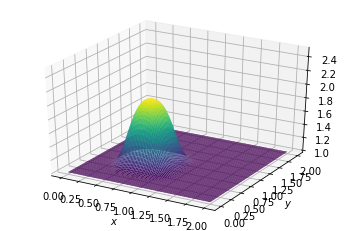

In [5]:
X, Y = numpy.meshgrid(x, y)
fig = pyplot.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis,
    linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');